In [1]:
import pandas as pd
import researchpy as rp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os


In [2]:
df = pd.read_csv("C:/Users/PC/Desktop/GroupProject_ST 3082/Final Project/Diabetes.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
rs = 73

In [5]:
styled_df = df.head()
styled_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
[rows,col] = df.shape
print(f"Rows : {rows} \nColumns : {col}")

Rows : 70692 
Columns : 22


In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df = df.astype(int)

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [10]:
## checking for category levels in each variable
# Initialize an empty dictionary to store unique category levels for each variable
unique_levels_dict = {}
# Iterate through each column in the DataFrame
for column in df.columns:
# Get unique category levels for the column
    unique_levels = df[column].unique()
# Store the unique category levels in the dictionary
    unique_levels_dict[column] = unique_levels
# Print the dictionary containing unique category levels for each variable
for variable, levels in unique_levels_dict.items():
    print(f"Variable: {variable}")
    print("Unique category levels:", levels)
    print()

Variable: Diabetes_binary
Unique category levels: [0 1]

Variable: HighBP
Unique category levels: [1 0]

Variable: HighChol
Unique category levels: [0 1]

Variable: CholCheck
Unique category levels: [1 0]

Variable: BMI
Unique category levels: [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]

Variable: Smoker
Unique category levels: [0 1]

Variable: Stroke
Unique category levels: [0 1]

Variable: HeartDiseaseorAttack
Unique category levels: [0 1]

Variable: PhysActivity
Unique category levels: [1 0]

Variable: Fruits
Unique category levels: [0 1]

Variable: Veggies
Unique category levels: [1 0]

Variable: HvyAlcoholConsump
Unique category levels: [0 1]

Variable: AnyHealthcare
Unique category levels: [1 0]

Variable: NoDocbcCost
Unique category levels: [0 1]

Variable: GenHlth
Unique category 

In [11]:
# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5)):
    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """
    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()
    # use for loop to plot
    for i in range(len(li_col)):
    # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i])
    # adjust the spacing of the subplots
    plt.subplots_adjust(
    wspace=0.5,
    hspace=0.5
)

NameError: name 'Xtrain' is not defined

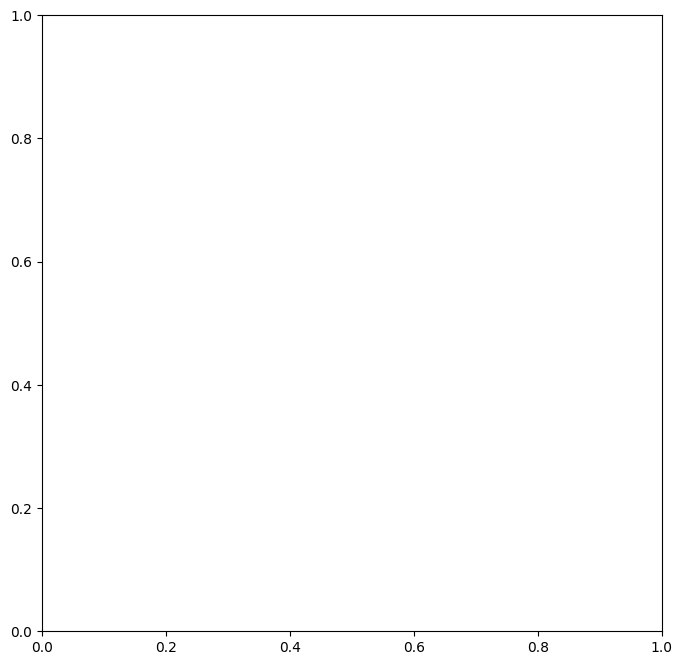

In [12]:
# Descriptive analysis
# Age category - There are 4 categories
plt.subplots(figsize=(8, 8))
sns.countplot(data=Xtrain, x='Age',hue="Age",palette="Set1")

# Set custom x-axis tick positions
plt.xticks([0, 1, 2, 3])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['age1', 'age 2', 'age 3', 'age 4'])
plt.legend(['age1', 'age 2', 'age 3', 'age 4'])
plt.show()

NameError: name 'Ytrain' is not defined

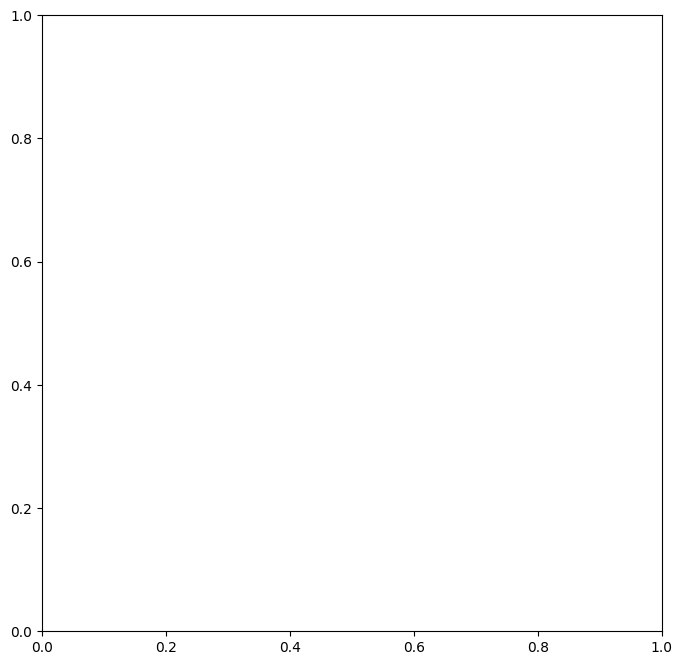

In [19]:
# To check ih the categories in the response variable are balanced with data
fig, ax = plt.subplots(figsize=(8, 8))
Diab = sns.countplot(data=Ytrain.to_frame(), x='Diabetes_binary', palette="Set1")

# Set custom x-axis tick positions
plt.xticks([0, 1])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(["Don't have Diabetes", 'Have Diabetes'])
plt.legend(["Don't have Diabetes", "Have Diabetes"])

for container in Diab.containers:
    Diab.bar_label(container)

plt.show()

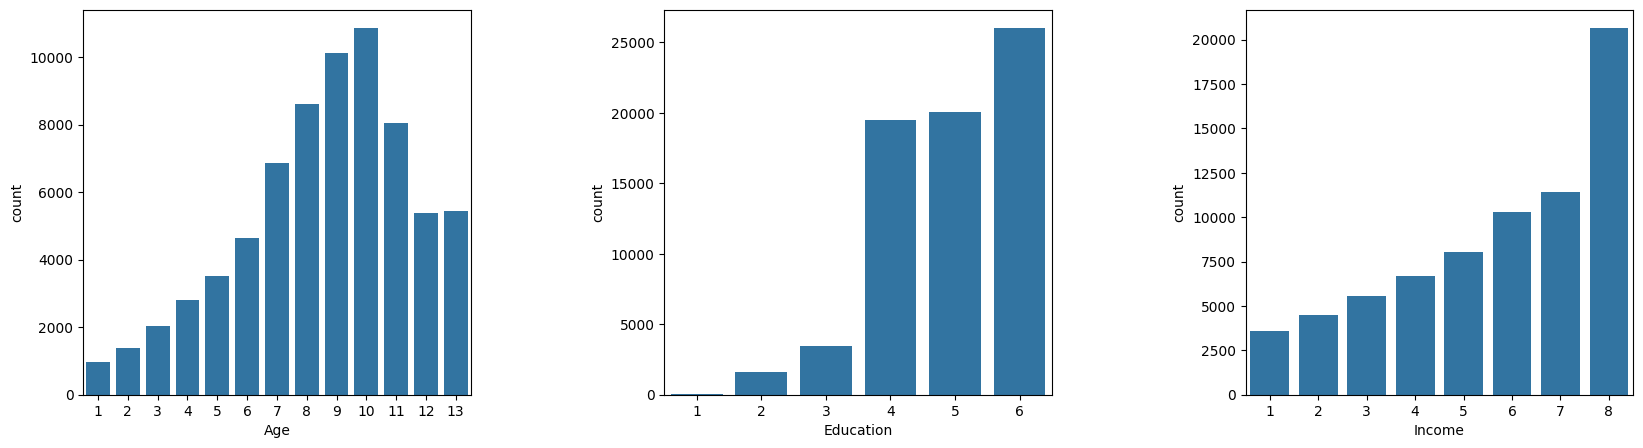

In [20]:
ida_plot(['Age', 'Education', 'Income'], 1, 3)

In [21]:
## recarogarizing
## age variable
# Create a mapping dictionary to map original categories to new categories
category_mapping = {
1: 1,
2: 1,
3: 2,
4: 2,
5: 2,
6: 2,
7: 3,
8: 3,
9: 3,
10: 3,
11: 4,
12: 4,
13: 4
}
# Use map function to apply the mapping to the age column
df['Age'] = df['Age'].map(category_mapping)
# Check the result
print(df['Age'].value_counts())

Age
3    36443
4    18864
2    13010
1     2375
Name: count, dtype: int64


In [22]:
## cheching if recategorization is right
unique_levels = df['Age'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels)

Unique category levels: [2 4 3 1]


In [23]:
## recarogarizing
## Education variable
# Create a mapping dictionary to map original categories to new categories
category_mapping2 = {
1: 1,
2: 2,
3: 2,
4: 2,
5: 3,
6: 4
}
# Use map function to apply the mapping to the age column
df['Education'] = df['Education'].map(category_mapping2)
# Check the result
print(df['Education'].value_counts())

Education
4    26020
2    24567
3    20030
1       75
Name: count, dtype: int64


In [24]:
## cheching if recategorization is right
unique_levels2 = df['Education'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels2)

Unique category levels: [4 3 2 1]


In [25]:
## recarogarizing
## Income variable
# Create a mapping dictionary to map original categories to new categories
category_mapping3 = {
1: 1,
2: 1,
3: 1,
4: 1,
5: 2,
6: 2,
7: 3,
8: 4
}
# Use map function to apply the mapping to the age column
df['Income'] = df['Income'].map(category_mapping3)
# Check the result
print(df['Income'].value_counts())

Income
4    20646
1    20324
2    18297
3    11425
Name: count, dtype: int64


In [26]:
## cheching if recategorization is right
unique_levels3 = df['Income'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels3)

Unique category levels: [4 3 2 1]


In [27]:
rs = 73

In [28]:
#[train, test]= train_test_split(df, random_state=rs, train_size = .8)
x=df.drop(columns='Diabetes_binary')
y=df['Diabetes_binary']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.20,stratify=y,random_state=73)

In [29]:
# Assuming df1 is your DataFrame and col_series is your Series (single column)

combined_df = Xtrain.join(Ytrain)
combined_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
54330,1,1,1,34,0,0,0,1,1,1,...,0,3,0,0,0,1,3,3,1,1
61696,1,0,1,43,1,0,1,1,1,1,...,0,5,30,30,0,0,2,2,3,1
53756,1,1,1,38,1,0,1,0,0,1,...,0,4,15,30,1,1,3,2,2,1
31981,0,1,1,21,0,0,0,0,1,1,...,0,2,0,0,0,0,3,4,2,0
34456,0,1,1,30,0,0,0,0,0,0,...,0,3,0,5,0,0,3,3,2,0


In [30]:
Xtrain.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
54330,1,1,1,34,0,0,0,1,1,1,...,1,0,3,0,0,0,1,3,3,1
61696,1,0,1,43,1,0,1,1,1,1,...,1,0,5,30,30,0,0,2,2,3
53756,1,1,1,38,1,0,1,0,0,1,...,1,0,4,15,30,1,1,3,2,2
31981,0,1,1,21,0,0,0,0,1,1,...,1,0,2,0,0,0,0,3,4,2
34456,0,1,1,30,0,0,0,0,0,0,...,1,0,3,0,5,0,0,3,3,2


In [31]:
Xtrain.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [32]:
# To check the structure of the training and testing data is same or not
Ytrain.value_counts(normalize=True) * 100

Diabetes_binary
1    50.000884
0    49.999116
Name: proportion, dtype: float64

In [33]:
# To check the structure of the training and testing data is same or not
Ytest.value_counts(normalize=True) * 100

Diabetes_binary
0    50.003536
1    49.996464
Name: proportion, dtype: float64

In [34]:
!pip install statsmodels

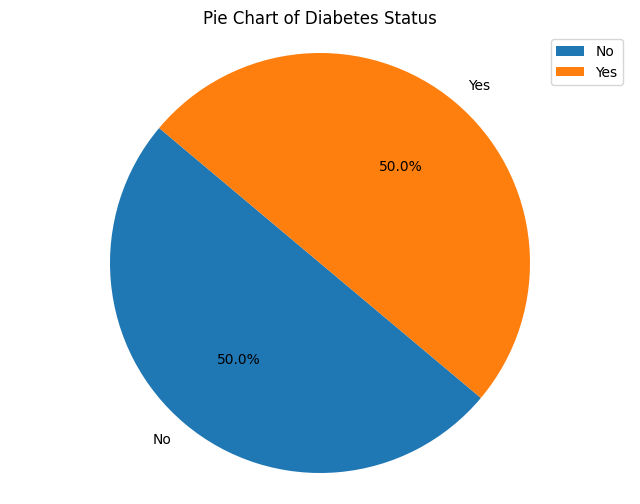

In [35]:
## Descriptive Analysis

# Diabetes Variable
category_counts1 = Ytrain.value_counts()
category_counts1.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts1, labels=category_counts1.index, autopct='%1.1f%%', startangle=140)
plt.legend(["No","Yes"])
plt.title('Pie Chart of Diabetes Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Diabetes.png')
plt.show()

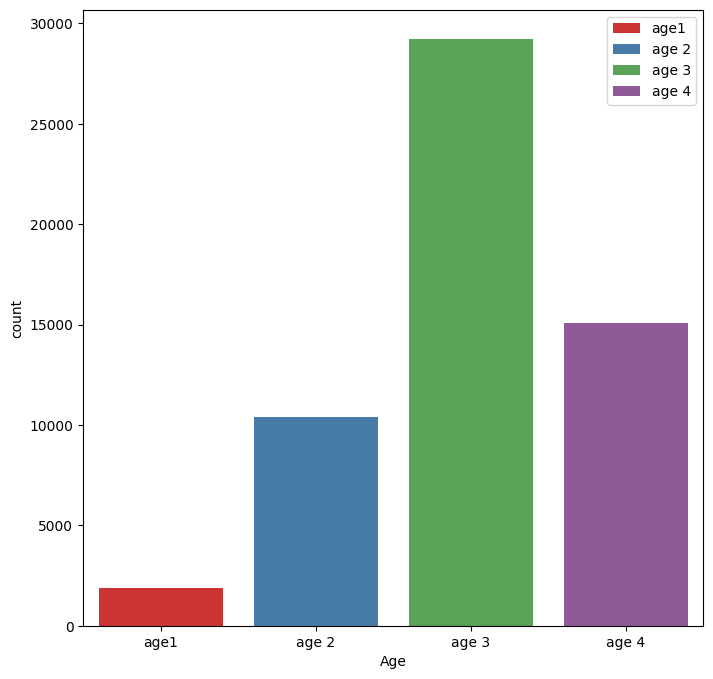

In [36]:
# Descriptive analysis
# Diabetes status category - There are 2 categories
plt.subplots(figsize=(8, 8))
sns.countplot(data=Xtrain, x='Age',hue="Age",palette="Set1")

# Set custom x-axis tick positions
plt.xticks([0, 1, 2, 3])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['age1', 'age 2', 'age 3', 'age 4'])
plt.legend(['age1', 'age 2', 'age 3', 'age 4'])
plt.show()

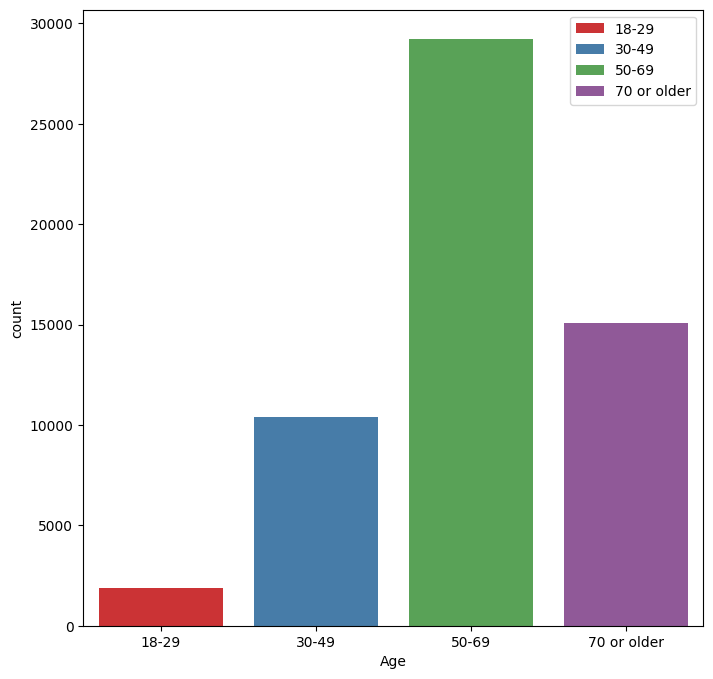

In [37]:
# Descriptive analysis
# Age category - There are 4 categories
plt.subplots(figsize=(8, 8))
sns.countplot(data=Xtrain, x='Age',hue="Age",palette="Set1")

# Set custom x-axis tick positions
plt.xticks([0, 1, 2, 3])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['18-29', '30-49', '50-69', '70 or older'])
plt.legend(['18-29', '30-49', '50-69', '70 or older'])
plt.show()

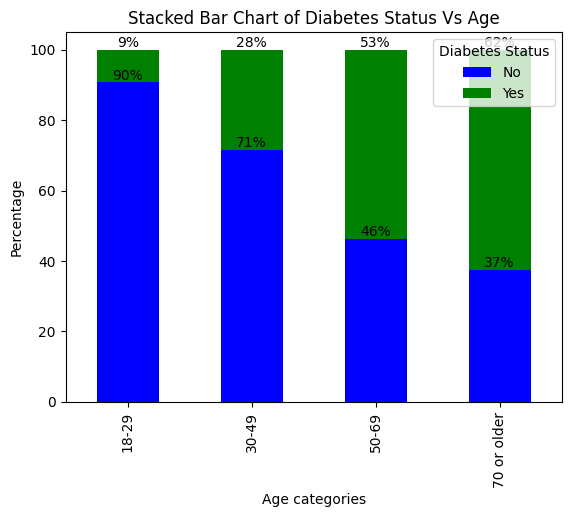

In [38]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Age','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'green'])

# Add labels and title
plt.xlabel('Age categories')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Age')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['18-29', '30-49','50-69','70 or older'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

In [39]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(Xtrain['Age'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)


In [40]:
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")

4285.754515944275 0.0
There is significant evidence to reject the null hypothesis (variables are associated).


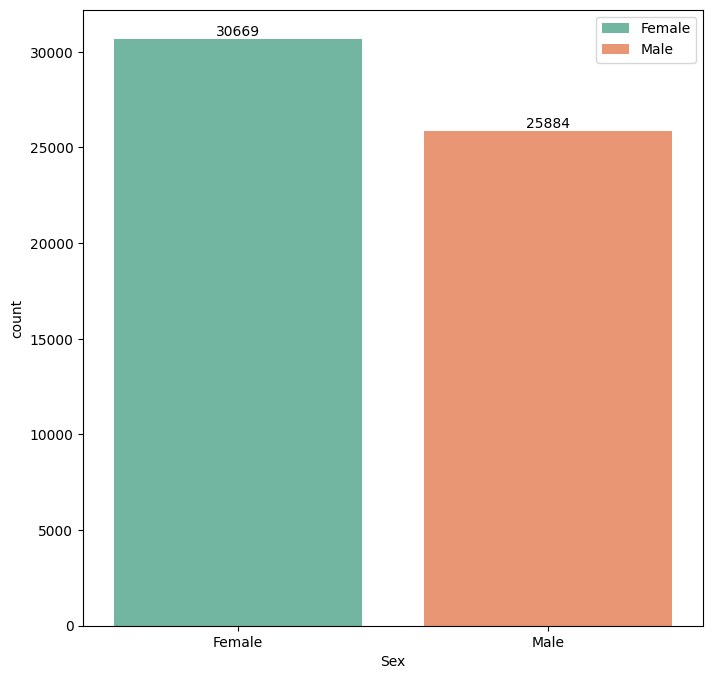

In [41]:
# Gender - There are 2 categories
plt.subplots(figsize=(8, 8))
sex_plot = sns.countplot(data=Xtrain, x='Sex',hue="Sex",palette="Set2")
# Set custom x-axis tick positions
plt.xticks([0, 1])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['Female', 'Male'])
plt.legend(['Female', 'Male'])


for container in sex_plot.containers:
    sex_plot.bar_label(container)

plt.show()

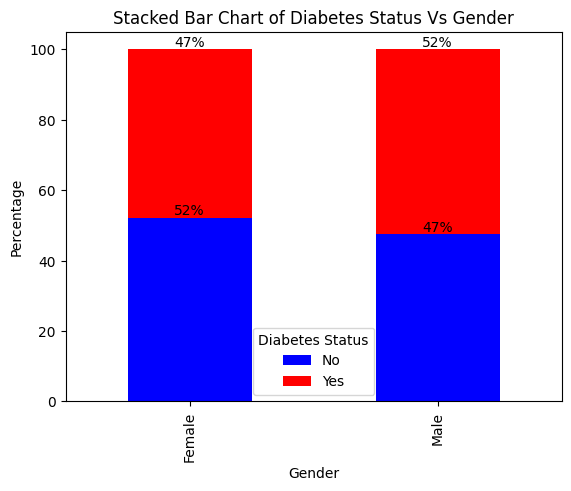

In [42]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Sex','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Gender')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Female', 'Male'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

In [43]:
# Chisquare test for identify whether there is an association between Sex and the Diabetes status
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(Xtrain['Sex'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")


122.3564115121977 1.9288118204710447e-28
There is significant evidence to reject the null hypothesis (variables are associated).


In [44]:
# Chisquare test for identify whether there is an association between Sex and the Diabetes status
from scipy.stats import chi2_contingency


for i in 
# Create a contingency table
contingency_table = pd.crosstab(Xtrain['Gender'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")


SyntaxError: invalid syntax (3466953192.py, line 5)

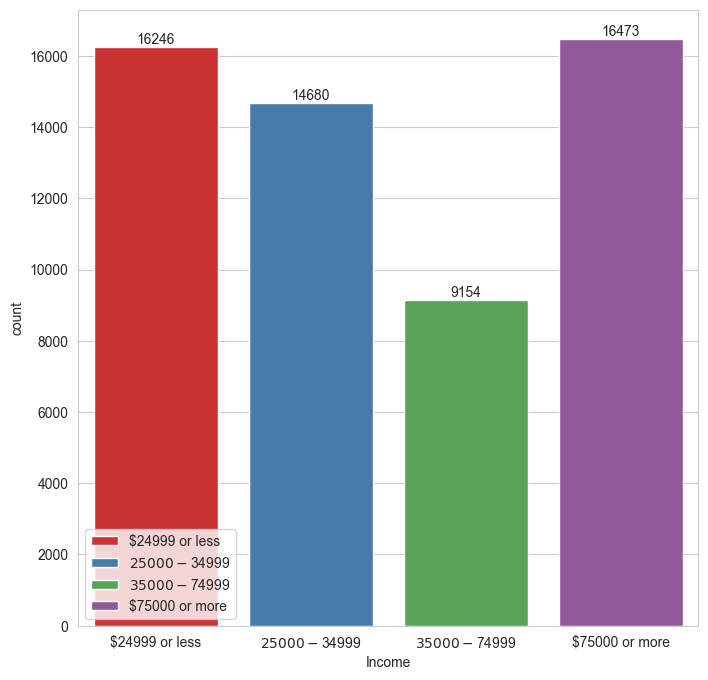

In [60]:
# Income categories - There are 4 categories
plt.subplots(figsize=(8, 8))
income_plot = sns.countplot(data=Xtrain, x='Income',hue="Income",palette="Set1")
# Set custom x-axis tick positions
plt.xticks([0, 1,2,3])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['$24999 or less', '$25000-$34999','$35000-$74999','$75000 or more'])
plt.legend(['$24999 or less', '$25000-$34999','$35000-$74999','$75000 or more'],loc = "lower left")


for container in income_plot.containers:
    income_plot.bar_label(container)

plt.show()


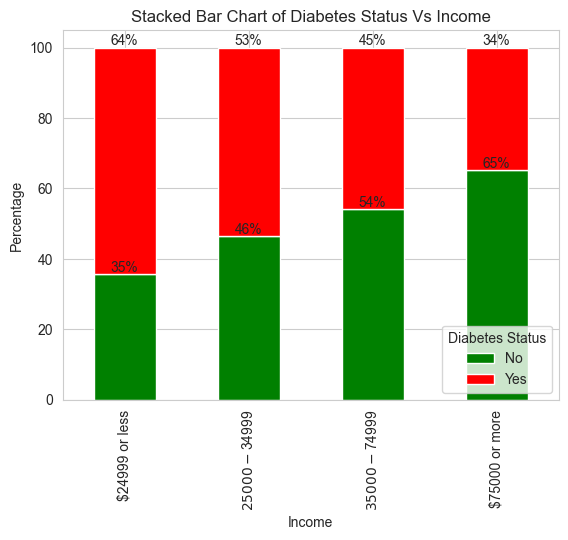

In [61]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Income','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['green', 'red'])

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Income')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['$24999 or less', '$25000-$34999','$35000-$74999','$75000 or more'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower right")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

In [ ]:
#Chisquare test for identify whether there is an association between Income levels and the Diabetes status
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(Xtrain['Income'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)


In [ ]:
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")

In [ ]:
# Any difficulty in walking - Yes or No
plt.subplots(figsize=(8, 8))
diffwalk_plot = sns.countplot(data=Xtrain, x='DiffWalk',hue="DiffWalk",palette="Set2")
# Set custom x-axis tick positions
plt.xticks([0, 1])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['No','Yes'])
plt.legend(['No','Yes'])


for container in diffwalk_plot.containers:
    diffwalk_plot.bar_label(container)

plt.show()

In [ ]:
#Chisquare test for identify whether there is an association between Income levels and the Diabetes status
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(Xtrain['DiffWalk'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [ ]:
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")

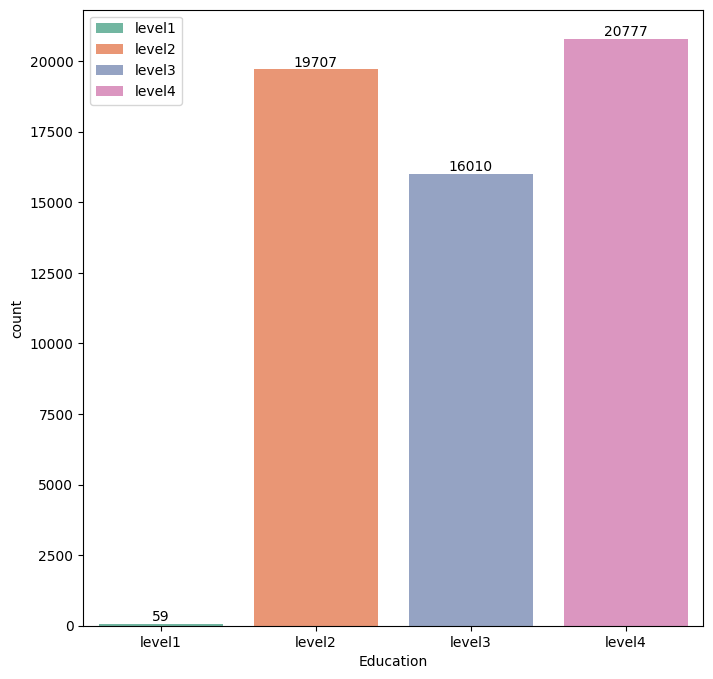

In [45]:
# Education categories - There are 4 categories
plt.subplots(figsize=(8, 8))
edu_plot = sns.countplot(data=Xtrain, x='Education',hue='Education',palette="Set2")
# Set custom x-axis tick positions
plt.xticks([0, 1,2,3])

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['level1','level2','level3','level4'])
plt.legend(['level1','level2','level3','level4'])


for container in edu_plot.containers:
    edu_plot.bar_label(container)

plt.show()


In [46]:
#Chisquare test for identify whether there is an association between Income levels and the Diabetes status
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(Xtrain['Education'], Ytrain)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [47]:
print(chi2, p )
alpha = 0.05
if p < alpha:
    print("There is significant evidence to reject the null hypothesis (variables are associated).")
else:
    print("There is not enough evidence to reject the null hypothesis (variables are not associated).")

1517.4638672956532 0.0
There is significant evidence to reject the null hypothesis (variables are associated).


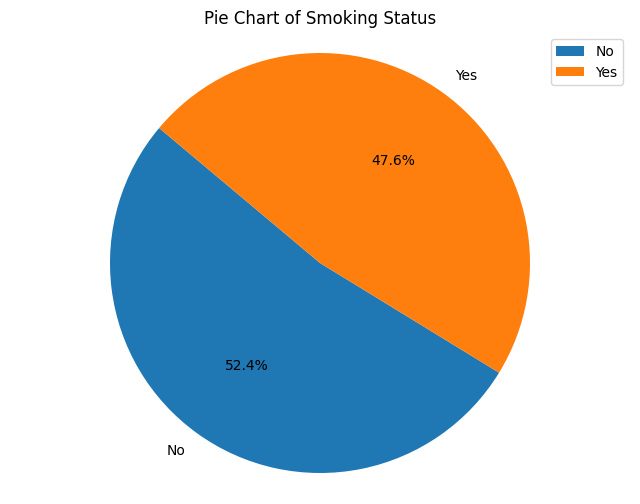

In [48]:
# Smoker 
category_counts5 = Xtrain['Smoker'].value_counts()
category_counts5.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts5, labels=category_counts5.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Smoking Status')
plt.legend(['No', 'Yes'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Smoke.png')
plt.show()

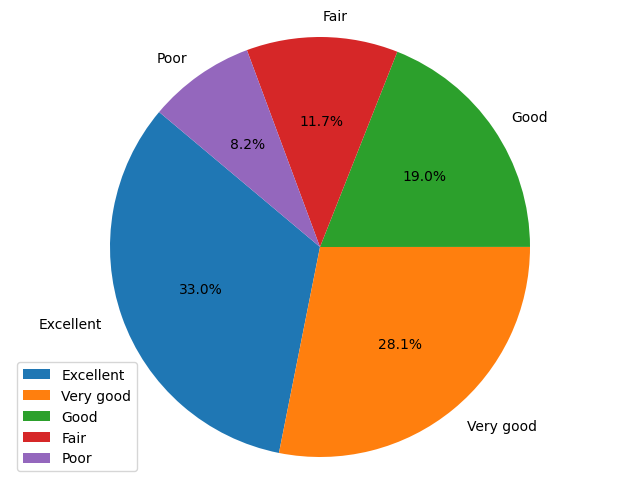

In [49]:
# General health
category_counts6 = Xtrain['GenHlth'].value_counts()
category_counts6.index = ['Excellent', 'Very good','Good','Fair','Poor']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts6, labels=category_counts6.index, autopct='%1.1f%%', startangle=140)
#plt.title('Pie Chart of General health Status')
plt.legend(['Excellent', 'Very good','Good','Fair','Poor'],loc='lower left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Stroke.png')
plt.show()

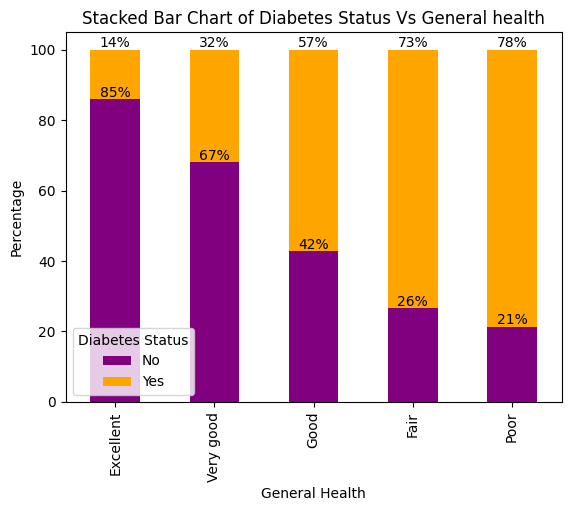

In [50]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['GenHlth','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['purple', 'orange'])

# Add labels and title
plt.xlabel('General Health')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs General health')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Excellent', 'Very good','Good','Fair','Poor'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

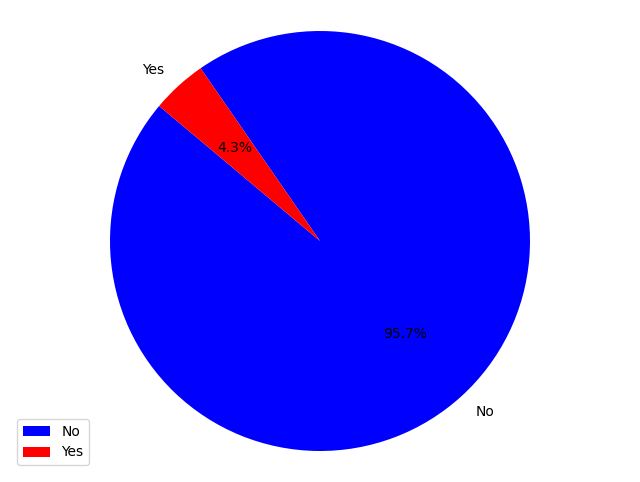

In [51]:
# General health
category_counts6 = Xtrain['HvyAlcoholConsump'].value_counts()
category_counts6.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts6, labels=category_counts6.index, autopct='%1.1f%%', startangle=140, colors= ['blue','red'])
#plt.title('Pie Chart of General health Status')
plt.legend(['No', 'Yes'],loc='lower left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Stroke.png')
plt.show()

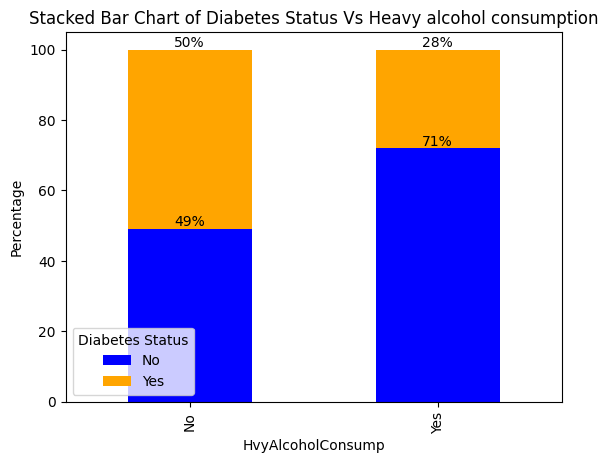

In [52]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['HvyAlcoholConsump','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'orange'])

# Add labels and title
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Heavy alcohol consumption')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

<Axes: xlabel='MentHlth', ylabel='Count'>

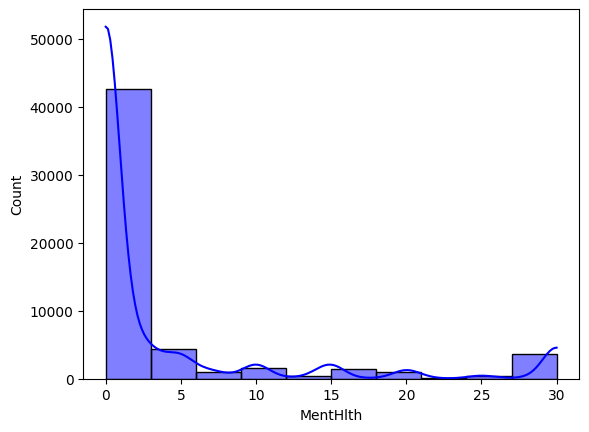

In [53]:
# Histogram for the Mental health issues occurances
sns.histplot(x=Xtrain["MentHlth"], bins=10, kde=True, color='blue', edgecolor='black')

In [54]:
Xtrain.columns


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Axes: xlabel='PhysHlth', ylabel='Count'>

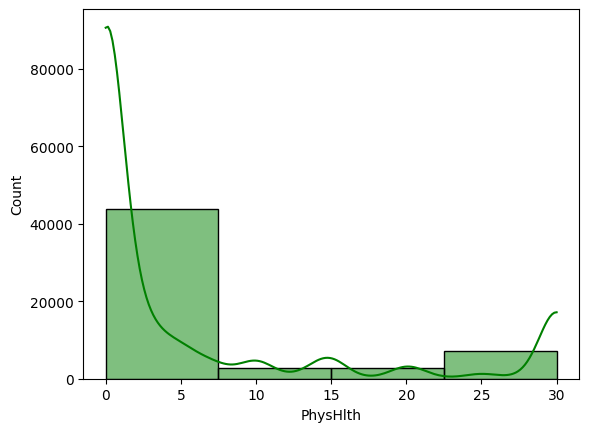

In [55]:
# Histogram for the physical health issues occurances
sns.histplot(x=Xtrain["PhysHlth"], bins=4, kde=True, color='green', edgecolor='black')


C:\Users\PC\AppData\Local\Temp\ipykernel_10188\1612671134.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['No', 'Yes'])


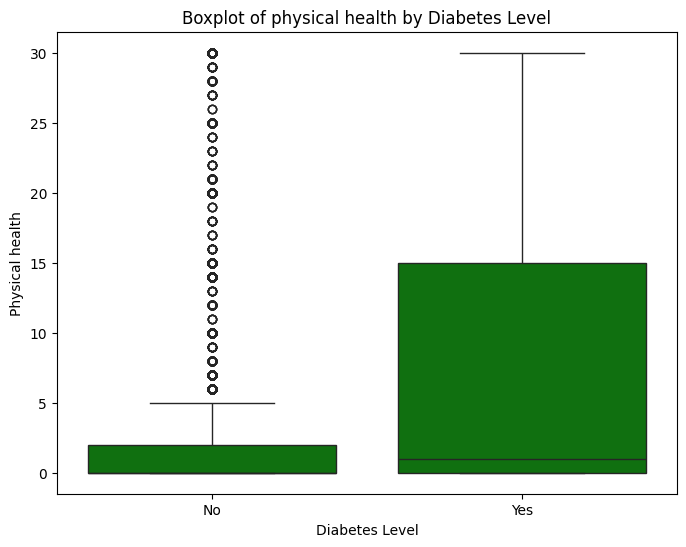

In [56]:
## boxplots of PhysHlth and Diabetes Levels
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='PhysHlth', data=combined_df, color = 'green')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Diabetes Level')
plt.ylabel('Physical health')
plt.title('Boxplot of physical health by Diabetes Level')
plt.show()

<Axes: xlabel='PhysHlth'>

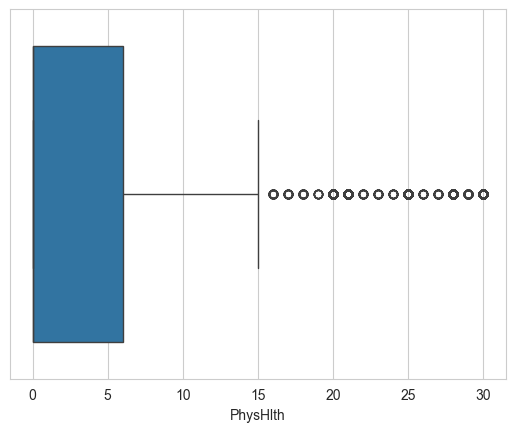

In [57]:
# Boxplot for number of physical issues occurances
sns.set_style("whitegrid") 
sns.boxplot(x=Xtrain["PhysHlth"])

<Axes: xlabel='MentHlth'>

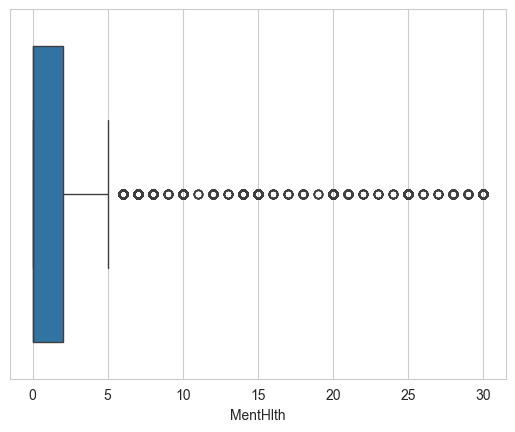

In [58]:
# Boxplot for number of physical issues occurances
sns.set_style("whitegrid") 
sns.boxplot(x=Xtrain["MentHlth"])

In [59]:
Xtrain

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
54330,1,1,1,34,0,0,0,1,1,1,...,1,0,3,0,0,0,1,3,3,1
61696,1,0,1,43,1,0,1,1,1,1,...,1,0,5,30,30,0,0,2,2,3
53756,1,1,1,38,1,0,1,0,0,1,...,1,0,4,15,30,1,1,3,2,2
31981,0,1,1,21,0,0,0,0,1,1,...,1,0,2,0,0,0,0,3,4,2
34456,0,1,1,30,0,0,0,0,0,0,...,1,0,3,0,5,0,0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396,1,1,1,21,0,0,0,1,0,1,...,1,0,3,5,2,0,0,3,4,2
45148,1,1,1,48,1,0,0,0,0,0,...,1,0,5,30,30,1,0,3,3,2
37483,1,1,1,39,1,0,1,1,1,0,...,1,0,1,0,30,1,1,3,4,1
56299,1,1,1,26,0,0,0,1,1,1,...,1,1,5,0,30,0,1,4,3,4


In [54]:
'''from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
dtrain = train'''

'from sklearn.preprocessing import LabelEncoder\n# Initialize LabelEncoder\ndtrain = train'

In [55]:
'''ordinal_cols = ['Age','Education','Income','GenHlth']

for var in ordinal_cols:
    label_encoder = LabelEncoder()
    dtrain[var] = label_encoder.fit_transform(dtrain[var])

dtrain
'''

"ordinal_cols = ['Age','Education','Income','GenHlth']\n\nfor var in ordinal_cols:\n    label_encoder = LabelEncoder()\n    dtrain[var] = label_encoder.fit_transform(dtrain[var])\n\ndtrain\n"

In [56]:
'''# Outlier detection
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
cov_matrix = np.cov(dtrain.values, rowvar=False)
mean_vector = dtrain.mean().values
dtrain['mahalanobis_distances'] = [mahalanobis(row.values, mean_vector, np.linalg.inv(cov_matrix)) for idx, row in dtrain.iterrows()]
#mahalanobis_distances = [mahalanobis(row.values, mean_vector, np.linalg.inv(cov_matrix)) for idx, row in train.iterrows()]
dtrain['p'] = 1 - chi2.cdf(dtrain['mahalanobis_distances'], 3)'''


"# Outlier detection\nfrom scipy.spatial.distance import mahalanobis\nfrom scipy.stats import chi2\ncov_matrix = np.cov(dtrain.values, rowvar=False)\nmean_vector = dtrain.mean().values\ndtrain['mahalanobis_distances'] = [mahalanobis(row.values, mean_vector, np.linalg.inv(cov_matrix)) for idx, row in dtrain.iterrows()]\n#mahalanobis_distances = [mahalanobis(row.values, mean_vector, np.linalg.inv(cov_matrix)) for idx, row in train.iterrows()]\ndtrain['p'] = 1 - chi2.cdf(dtrain['mahalanobis_distances'], 3)"

In [57]:
'''# What are the extreme points? 
# Here we go!
# Extreme values with a significance level of 0.01
dtrain.loc[dtrain.p < 0.01].head(10)'''

'# What are the extreme points? \n# Here we go!\n# Extreme values with a significance level of 0.01\ndtrain.loc[dtrain.p < 0.01].head(10)'

In [58]:
!pip install xgboost

In [38]:
import xgboost as xgb

In [60]:
#!pip install category_encoders

In [61]:
#dtrain.columns

In [67]:
from itertools import combinations
import scipy.stats as stats

In [ ]:
categorical_predictors = filtered

In [39]:
Xtrain.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [63]:
'''from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder

ordinal_cols = ['Age','Education','Income','GenHlth']

for var in ordinal_cols:
    label_encoder = LabelEncoder()
    train[var] = label_encoder.fit_transform(train[var])

train
train['Age']'''


"from sklearn.preprocessing import LabelEncoder\n# Initialize LabelEncoder\n\nordinal_cols = ['Age','Education','Income','GenHlth']\n\nfor var in ordinal_cols:\n    label_encoder = LabelEncoder()\n    train[var] = label_encoder.fit_transform(train[var])\n\ntrain\ntrain['Age']"

In [40]:
Xtrain['Age']

54330    3
61696    2
53756    3
31981    3
34456    3
        ..
19396    3
45148    3
37483    3
56299    4
69034    4
Name: Age, Length: 56553, dtype: int64

In [67]:

#Ytrain = train['Diabetes_binary']
#Xtrain = train.drop('Diabetes_binary', axis=1)
#Ytest = test['Diabetes_binary']
#Xtest = test.drop('Diabetes_binary',axis=1)


In [41]:
# XG Boost
xgbr = xgb.XGBClassifier()
dtrain = xgb.DMatrix(Xtrain, label=Ytrain, enable_categorical=True)

# xgboost model fit with default parameters
model = xgbr.fit(Xtrain,Ytrain)
Y_pred = model.predict(Xtest)
Y_pred_tr = model.predict(Xtrain)

from sklearn.metrics import accuracy_score
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

# parameter tuning with grid search
from sklearn.model_selection import train_test_split, GridSearchCV
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,400,450,500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.5,0.2,0.1, 0.01, 0.001]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, scoring='accuracy')
model_xg = grid_search.fit(Xtrain, Ytrain)

# The best parameters - After tuning
best_params = model_xg.best_params_
best_params

best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(Xtrain,Ytrain)

Y_pred = best_xgb_model.predict(Xtest)
Y_pred_tr = best_xgb_model.predict(Xtrain)
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

In [42]:
from sklearn.metrics import accuracy_score
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]


[0.7849274132229943, 0.7436876723955018]

In [ ]:
# parameter tuning with grid search
from sklearn.model_selection import train_test_split, GridSearchCV
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,400,450,500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.5,0.2,0.1, 0.01, 0.001]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, scoring='accuracy')
model_xg = grid_search.fit(Xtrain, Ytrain)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x0000020627164800>>
Traceback (most recent call last):
  File "C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 589, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


In [71]:
# The best parameters - After tuning
best_params = model_xg.best_params_
best_params


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [72]:
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(Xtrain,Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
Y_pred = best_xgb_model.predict(Xtest)

In [74]:
Y_pred_tr = best_xgb_model.predict(Xtrain)

In [75]:
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

[0.7587219068838081, 0.7463045477049296]

In [76]:
# Feature importance plot in xgboost
feature_importance = best_xgb_model.feature_importances_
print(feature_importance)
max(feature_importance)

[0.5724707  0.09456951 0.02399413 0.0255124  0.00350679 0.00684969
 0.03247178 0.00303413 0.00256123 0.00200041 0.01902962 0.00212238
 0.00203991 0.10609107 0.00382004 0.00224929 0.02909761 0.01309201
 0.03770837 0.00364816 0.01413075]


0.5724707

In [77]:
print(best_xgb_model.feature_importances_.argsort())

[ 9 12 11 15  8  7  4 19 14  5 17 20 10  2  3 16  6 18  1 13  0]


[ 9 12 11 15  8  7  4 19 14  5 17 20 10  2  3 16  6 18  1 13  0]


Text(0.5, 0, 'Feature Importance')

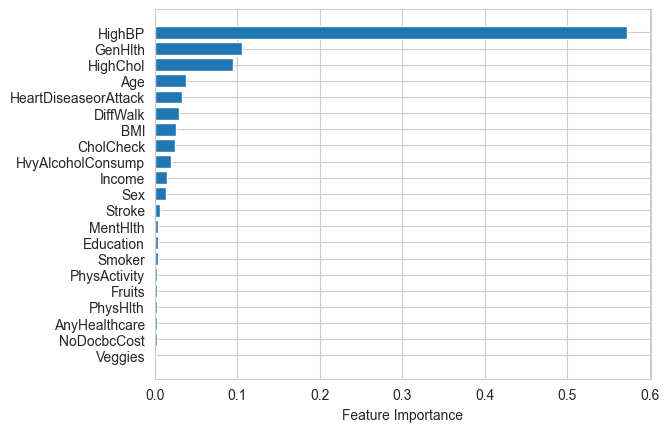

In [78]:
sorted = best_xgb_model.feature_importances_.argsort()
print(sorted)
plt.barh(Xtrain.columns[sorted],best_xgb_model.feature_importances_[sorted])
plt.xlabel("Feature Importance")

In [ ]:
#Imp_var = ['HighBP','HighChol', 'CholCheck','Age','GenHlth','HeartDiseaseorAttack','BMI','HvyAlcoholConsump','DiffWalk','Income','Sex']

In [ ]:
'''NYtrain = train['Diabetes_binary']
NXtrain = train[Imp_var]
NYtest = test['Diabetes_binary']
NXtest = test[Imp_var]
NXtest'''

In [ ]:
'''
# parameter tuning with grid search
# Define hyperparameters for grid search
Nparam_grid = {
    'n_estimators': [50, 100, 150,200,250,300,400,450,500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.5,0.2,0.1, 0.01, 0.001],
}
# Perform grid search with cross-validation
Ngrid_search = GridSearchCV(estimator=xgbr, param_grid=Nparam_grid, cv=5,scoring="accuracy")
Ngrid_search.fit(NXtrain, NYtrain)
'''

In [ ]:
'''
# The best parameters - After tuning
Nbest_params = Ngrid_search.best_params_
Nbest_params
'''

In [ ]:
'''
New_best_xgb_model = xgb.XGBClassifier(**Nbest_params)
New_best_xgb_model.fit(NXtrain,NYtrain)
'''

In [ ]:
#NY_pred =New_best_xgb_model.predict(NXtest)

In [ ]:
#NY_pred_tr =New_best_xgb_model.predict(NXtrain)

In [ ]:
'''
Ntr_accuracy = accuracy_score(NYtrain,NY_pred_tr)
Nts_accuracy = accuracy_score(NYtest, NY_pred)
[Ntr_accuracy,Nts_accuracy]
'''

In [ ]:
#import pickle

In [ ]:
'''
filename = r'C:\Users\PC\Desktop\GroupProject_ST 3082\App\model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(New_best_xgb_model, f)

print("Model saved successfully.")'''

In [98]:
# Lasso Regression classifier
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
lasso_classifier = Lasso(alpha=0.1)

scaler = StandardScaler()
Xtrain_sc = scaler.fit_transform(Xtrain)
Xtest_sc = scaler.transform(Xtest)

lasso_classifier.fit(Xtrain_sc, Ytrain)

Y_pred = lasso_classifier.predict(Xtest_sc)
Y_pred_tr = lasso_classifier.predict(Xtrain_sc)

print(lasso_classifier.coef_)
coefficients = pd.DataFrame({'Feature': Xtrain.columns, 'Coefficient': lasso_classifier.coef_})
print(coefficients)

# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_ts = accuracy_score(Ytest, Y_pred.round())
accuracy_tr = accuracy_score(Ytrain, Y_pred_tr.round())
conf_matrix_ts = confusion_matrix(Ytest, Y_pred.round())
print(f"Accuracy_ts: {accuracy_ts}")
print(f"Accuracy_tr: {accuracy_tr}")
print(f"Confusion Matrix:\n{conf_matrix_ts}")

Lasso(alpha=0.1)

[ 0.06291992  0.00574289  0.          0.01064471  0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.07865673  0.          0.          0.          0.
  0.         -0.         -0.        ]
                 Feature  Coefficient
0                 HighBP     0.062920
1               HighChol     0.005743
2              CholCheck     0.000000
3                    BMI     0.010645
4                 Smoker     0.000000
5                 Stroke     0.000000
6   HeartDiseaseorAttack     0.000000
7           PhysActivity    -0.000000
8                 Fruits    -0.000000
9                Veggies    -0.000000
10     HvyAlcoholConsump    -0.000000
11         AnyHealthcare     0.000000
12           NoDocbcCost     0.000000
13               GenHlth     0.078657
14              MentHlth     0.000000
15              PhysHlth     0.000000
16              DiffWalk     0.000000
17                   Sex     0.000000
18                   Age     0.000000
19     

In [102]:
# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_ts = accuracy_score(Ytest, Y_pred.round())
accuracy_tr = accuracy_score(Ytrain, Y_pred_tr.round())
conf_matrix_ts = confusion_matrix(Ytest, Y_pred.round())

print(f"Accuracy_ts: {accuracy_ts}")
print(f"Accuracy_tr: {accuracy_tr}")
print(f"Confusion Matrix:\n{conf_matrix_ts}")

Accuracy_ts: 0.7214795954452224
Accuracy_tr: 0.7263982458932329
Confusion Matrix:
[[5010 2060]
 [1878 5191]]


In [33]:
########## Random Forest ##########
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(Xtrain,Ytrain)
# Evaluating the model
y_pred = rf_classifier.predict(Xtest)
y_pred_tr = rf_classifier.predict(Xtrain)
accuracy_test = accuracy_score(Ytest, y_pred)
print("Accuracy test:", accuracy_test)
accuracy_train = accuracy_score(Ytrain, y_pred_tr)
print("Accuracy train:", accuracy_train)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Ytest, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Accuracy test: 0.7267133460640781
Accuracy train: 0.985500327126766
Confusion Matrix:
[[4861 2209]
 [1655 5414]]


In [35]:
######random forest parameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1, 2, 4]
}

# Creating Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(Xtest)
y_pred2 = best_rf_classifier.predict(Xtrain)

accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy test:", accuracy)
accuracy2 = accuracy_score(Ytrain, y_pred2)
print("Accuracy train:", accuracy2)
conf_matrix = confusion_matrix(Ytest, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy test: 0.7455265577480727
Accuracy train: 0.7709935812423744
Confusion Matrix:
[[4966 2104]
 [1494 5575]]


In [36]:
# Get the number of variables (features)
num_variables = best_rf_classifier.n_features_in_

print("Number of variables in the Random Forest:", num_variables)

Number of variables in the Random Forest: 21


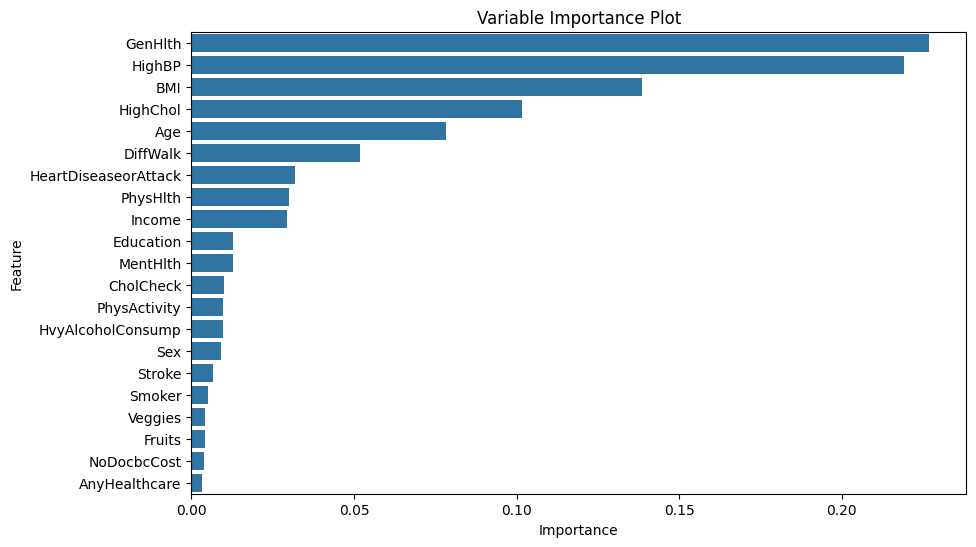

In [37]:
# Getting feature importances
importances = best_rf_classifier.feature_importances_

# Creating a DataFrame with feature importances
feature_importances_df = pd.DataFrame({'feature': Xtrain.columns, 'importance': importances})

# Sorting the DataFrame by feature importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plotting the variable importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Variable Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
Imp_var = ['GenHlth','HighBP','BMI','HighChol', 'Age', 'DiffWalk','Income', 'HeartDiseaseorAttack','PhysHlth']

In [39]:
NYtrain = Ytrain
NXtrain = Xtrain[Imp_var]
NYtest = Ytest
NXtest = Xtest[Imp_var]
NXtest

,GenHlth,HighBP,BMI,HighChol,Age,DiffWalk,Income,HeartDiseaseorAttack,PhysHlth
27193,5,1,28,1,4,1,2,0,14
2377,1,0,28,0,3,0,2,0,3
2674,1,0,19,0,1,0,4,0,0
40653,3,0,30,0,2,1,1,0,30
46107,3,1,34,1,3,0,2,1,0
...,...,...,...,...,...,...,...,...,...
39321,3,1,34,0,3,1,1,0,5
14110,2,0,23,0,1,0,3,0,0
40688,3,1,43,0,3,1,3,0,0
983,3,0,27,0,3,0,3,0,0


In [40]:
######random forest parameter tuning

# Define the parameter grid
Nparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1, 2, 4]
}

# Creating Random Forest classifier
Nrf_classifier = RandomForestClassifier(random_state=42)

# Grid search with cross-validation
Ngrid_search = GridSearchCV(estimator=Nrf_classifier, param_grid=Nparam_grid, cv=5, scoring='accuracy', n_jobs=-1)
Ngrid_search.fit(NXtrain, NYtrain)

# Best parameters found
print("Best Parameters:", Ngrid_search.best_params_)

# Evaluate the best model
Nbest_rf_classifier = Ngrid_search.best_estimator_
Ny_pred = Nbest_rf_classifier.predict(NXtest)
Ny_pred2 = Nbest_rf_classifier.predict(NXtrain)

Naccuracy = accuracy_score(NYtest, Ny_pred)
print("Accuracy test:", Naccuracy)
Naccuracy2 = accuracy_score(NYtrain, Ny_pred2)
print("Accuracy train:", Naccuracy2)
Nconf_matrix = confusion_matrix(NYtest, Ny_pred)

print("Confusion Matrix:")
print(Nconf_matrix)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 300}
Accuracy test: 0.7412122498055025
Accuracy train: 0.7636199671104981
Confusion Matrix:
[[4957 2113]
 [1546 5523]]


In [41]:
import pickle

filename = r'C:\Users\PC\Desktop\GroupProject_ST 3082\App\model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(Nbest_rf_classifier, f)

print("Model saved successfully.")

Model saved successfully.
